In [1]:
from datetime import datetime
import csv
import numpy as np
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt

In [36]:
f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)
c=0
for i in reader:
    print(i)
    if c > 5:
        break
    c+=1
print(c)

['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
['1B5C0970F2AE8CFFBA8AE4584BEAED29', 'D961332334524990D1BBD462E2EFB8A4', 'CMT', '1', 'N', '2013-02-08 23:35:14', '2013-02-08 23:42:58', '1', '463', '.80', '-73.992439', '40.724487', '-73.984421', '40.718903']
['B42249AE16E2B8E556F1CB1F940D6FB4', 'D4BB308D1F3FCB3434D9DB282CDC93D7', 'CMT', '1', 'N', '2013-02-07 12:20:16', '2013-02-07 12:50:27', '4', '1810', '3.10', '-73.989494', '40.769588', '-73.990303', '40.737347']
['890699222C47C09FBC898758CEC69762', '6318C3AEC02248928C3345B5805EB905', 'CMT', '1', 'N', '2013-02-08 08:56:54', '2013-02-08 08:59:43', '1', '168', '1.00', '-73.963036', '40.799141', '-73.972168', '40.786446']
['74B7D835C2CD98606D5256DA8A38E045', 'D5E278C918256D1F97680A1F04D290E0', 'CMT', '1', 'N', '2013-02-08 09:37:02', '20

In [2]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)

min_date = None
max_date = None
c = 0
pickup_l, dropoff_l = [], []
cols = None

for row in reader:
    dts_pickup, dts_dropoff = row[5], row[6]
    dto_pickup, dto_dropoff = None, None
    try:
        dto_pickup = datetime.strptime(dts_pickup, '%Y-%m-%d %H:%M:%S')
        dto_dropoff = datetime.strptime(dts_dropoff, '%Y-%m-%d %H:%M:%S')
    except Exception as e:
        print(e)
    if not dto_pickup is None:
        pickup_l.append(dto_pickup)
    
    if not dto_dropoff is None:
        dropoff_l.append(dto_dropoff)
    
    if c == 0:
        cols = row

    c+=1

pickup_dt_range = max(pickup_l) - min(pickup_l)
dropoff_dt_range = max(dropoff_l) - min(dropoff_l)

time data 'pickup_datetime' does not match format '%Y-%m-%d %H:%M:%S'
CPU times: user 1min 43s, sys: 1.46 s, total: 1min 44s
Wall time: 1min 45s


### 1. What datetime range does your data cover?  How many rows are there total?

In [3]:
print('\n1. What datetime range does your data cover?  How many rows are there total?')
print(f'min pickup datetime: {min(pickup_l)} | max pickup datetime: {max(pickup_l)}')
print(f'min dropoff datetime: {min(dropoff_l)} | max dropoff datetime: {max(dropoff_l)}')
print(f'\nPickup datetime range: {pickup_dt_range} \nDropoff datetime range: {dropoff_dt_range} \nTotal number of rows: {c-1}')
print('\n')


1. What datetime range does your data cover?  How many rows are there total?
min pickup datetime: 2013-02-01 00:00:00 | max pickup datetime: 2013-02-28 23:59:59
min dropoff datetime: 2013-02-01 00:00:55 | max dropoff datetime: 2013-03-01 01:15:48

Pickup datetime range: 27 days, 23:59:59 
Dropoff datetime range: 28 days, 1:14:53 
Total number of rows: 13990176




### 2. What are the field names?  Give descriptions for each field.

In [41]:
f=open("trip_data_2.csv",'r')
reader=csv.reader(f)
for row in reader:
    print("Field Names:",*row,sep='\n')
    break

Field Names:
medallion
hack_license
vendor_id
rate_code
store_and_fwd_flag
pickup_datetime
dropoff_datetime
passenger_count
trip_time_in_secs
trip_distance
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude


In [4]:
print("What are the field names?  Give descriptions for each field.")
print('Field names -- ', cols)
print('''\nColumns            | Description 
-------------------|------------------------
medallion          | A medallion is a permit that allows a driver to operate a taxi in United States
hack_license       | A license needed to ride the yellow medalian taxicab
vendor_id          | A code indicating the provider associated with the trip record
rate_code          | Rating provide for the trip
store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
pickup_datetime    | Date and time when the trip was started
dropoff_datetime   | Date and time when the trip was ended
passenger_count    | Total number of passangers boarded in the taxi
trip_time_in_secs  | Total time take to complete the trip in seconds
trip_distance      | Total distance covered to complete the trip
pickup_longitude   | The longitude of the pickup point
pickup_latitude    | The latitude of the pickup point
dropoff_longitude  | The longitude of the dropoff point
dropoff_latitude   | The longitude of the dropoff point
''')

What are the field names?  Give descriptions for each field.
Field names --  ['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

Columns            | Description 
-------------------|------------------------
medallion          | A medallion is a permit that allows a driver to operate a taxi in United States
hack_license       | A license needed to ride the yellow medalian taxicab
vendor_id          | A code indicating the provider associated with the trip record
rate_code          | Rating provide for the trip
store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
pickup_datetime    | Date and time when the tr

### 3. Give some sample data for each field.

In [47]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)
sample_data = {}
c = 0

for row in reader:
    if c == 0:
        for col_name in row:
            sample_data[col_name] = []
    elif c>0 and c<11:
        for data, col_name in zip(row, sample_data):
            sample_data[col_name].append(data)
    c+=1

print('''Give some sample data for each field.''')
for i in sample_data:
    print(f'{i}: {sample_data[i]},\n')

# c = 0
# for row in reader:
#     print(*row, sep=' | ')
#     if c>5:
#         break
#     c+=1

Give some sample data for each field.
medallion: ['1B5C0970F2AE8CFFBA8AE4584BEAED29', 'B42249AE16E2B8E556F1CB1F940D6FB4', '890699222C47C09FBC898758CEC69762', '74B7D835C2CD98606D5256DA8A38E045', '4003B8478418FEC5D761E2F37602769B', 'D72DF7B12201912BFDBB93081EF04C96', 'FA5337E245DE9B2E124AFA735B41B4DF', 'BE63343BAD5CD6F99EC435812E332445', '58598FD2F8811C4F52A264D15D6FECAF', 'FE13CDF111CE4A3811F3E5D942BFD3B9'],

hack_license: ['D961332334524990D1BBD462E2EFB8A4', 'D4BB308D1F3FCB3434D9DB282CDC93D7', '6318C3AEC02248928C3345B5805EB905', 'D5E278C918256D1F97680A1F04D290E0', '0B766F1054A5C16D86BC023858BD8143', 'AFD828EEF790A2485BBB0B568A8BE22E', '6E6B7D73303D5AE3808A9ABF4D3FF65B', '88CF6CAA78CE8B2000FBCF39DFAB3E69', 'F6F9DF7755F186C183EEBB5B03DBA23C', 'BAC511461590FAF7D7BB4C8F29C31AC5'],

vendor_id: ['CMT', 'CMT', 'CMT', 'CMT', 'CMT', 'CMT', 'CMT', 'CMT', 'CMT', 'CMT'],

rate_code: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],

store_and_fwd_flag: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

<!-- ### 4. What MySQL data types / len would you need to store each of the fields?
        a. int(xx), varchar(xx),date,datetime,bool, decimal(m,d) -->

### 4. What MySQL data types / len would you need to store each of the fields? int(xx), varchar(xx),date,datetime,bool, decimal(m,d)

In [48]:
print('''What MySQL data types / len would you need to store each of the fields?''')
print(f'''
{'Columns':<20}| Datatype(len)
{'--------------------|-------------'}
{'medallion':<20}| varchar(100)
{'hack_license':<20}| varchar(100)
{'vendor_id':<20}| varchar(5)
{'rate_code':<20}| int
{'store_and_fwd_flag':<20}| varchar(10)
{'pickup_datetime':<20}| datetime
{'dropoff_datetime':<20}| datetime
{'passenger_count':<20}| int
{'trip_time_in_secs':<20}| decimal(10,6)
{'trip_distance':<20}| decimal(6,2)
{'pickup_longitude':<20}| decimal(4, 10)
{'pickup_latitude':<20}| decimal(4, 10)
{'dropoff_longitude':<20}| decimal(4, 10)
{'dropoff_latitude':<20}| decimal(4, 10)
''')

What MySQL data types / len would you need to store each of the fields?

Columns             | Datatype(len)
--------------------|-------------
medallion           | varchar(100)
hack_license        | varchar(100)
vendor_id           | varchar(5)
rate_code           | int
store_and_fwd_flag  | varchar(10)
pickup_datetime     | datetime
dropoff_datetime    | datetime
passenger_count     | int
trip_time_in_secs   | decimal(10,6)
trip_distance       | decimal(6,2)
pickup_longitude    | decimal(4, 10)
pickup_latitude     | decimal(4, 10)
dropoff_longitude   | decimal(4, 10)
dropoff_latitude    | decimal(4, 10)



### 5. What is the geographic range of your data (min/max - X/Y)?
        a. Plot this (approximately on a map)

In [18]:
print('''What is the geographic range of your data (min/max - X/Y)?
a. Plot this (approximately on a map)''')

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)

# Initialize variables for extreme points
eastmost_longitude = -float('inf')
westmost_longitude = float('inf')
northmost_latitude = -float('inf')
southmost_latitude = float('inf')

def haversine(lon1, lat1, lon2, lat2):
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    d = R*c
    return d
    
c = 0  
for row in reader:
    if c == 0:  
       c += 1
       continue
        
    pickup_longitude = float(row[10])
    pickup_latitude = float(row[11])
    # dropoff_longitude = float(row[12])  # Handle missing values if necessary (e.g., using a try-except block)
    try:
        dropoff_longitude = float(row[12])
    except ValueError:
        continue  

    dropoff_latitude = float(row[13])
        
    if c > 0 and row[10] not in ['', '-', None] and row[11] not in ['', '-', None] and row[12] not in ['', '-', None] and row[13] not in ['', '-', None]:
        lon1, lat1, lon2, lat2 = float(row[10]), float(row[11]), float(row[12]), float(row[13])
        trip_dist_h = haversine(lon1, lat1, lon2, lat2)
        trip_dist = float(row[9])
    
    if abs(trip_dist - trip_dist_h) < 2:
        if (pickup_latitude >= 24.521208 and pickup_latitude <= 49.382808) and \
        (dropoff_latitude >= 24.521208 and dropoff_latitude <= 49.382808) and \
        (pickup_longitude >= -124.736342 and pickup_longitude <= -66.945392) and \
        (dropoff_longitude >= -124.736342 and dropoff_longitude <= -66.945392):
            # Update extreme points
            eastmost_longitude = max(eastmost_longitude, pickup_longitude, dropoff_longitude)
            westmost_longitude = min(westmost_longitude, pickup_longitude, dropoff_longitude)
            northmost_latitude = max(northmost_latitude, pickup_latitude, dropoff_latitude)
            southmost_latitude = min(southmost_latitude, pickup_latitude, dropoff_latitude)

    c += 1

# Create the four-sided shape coordinates
shape_coordinates = [(eastmost_longitude, northmost_latitude),
                    (eastmost_longitude, southmost_latitude),
                    (westmost_longitude, southmost_latitude),
                    (westmost_longitude, northmost_latitude)]

print(shape_coordinates)


What is the geographic range of your data (min/max - X/Y)?
a. Plot this (approximately on a map)
[(-71.099113, 47.721272), (-71.099113, 32.793495), (-84.873749, 32.793495), (-84.873749, 47.721272)]


In [6]:
max(eastmost_longitude, pickup_longitude, dropoff_longitude)

2228.7683

### 6. What is the average overall computed trip distance? (You should use Haversine Distance)

In [49]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)

c = 0
distances = []
distances2 = []

def haversine(lon1, lat1, lon2, lat2):
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    d = R*c
    return d


for row in reader:
    if c > 0 and row[10] not in ['', '-', None] and row[11] not in ['', '-', None] and row[12] not in ['', '-', None] and row[13] not in ['', '-', None]:
        lon1, lat1, lon2, lat2 = float(row[10]), float(row[11]), float(row[12]), float(row[13])
        distances.append(haversine(lon1, lat1, lon2, lat2))
        distances2.append(float(row[9]))
    c+=1

print('''What is the average overall computed trip distance? (You should use Haversine Distance)''')
# print(min(distances), max(distances), np.median(distances), np.mean(distances))
# print(min(distances2), max(distances2), np.median(distances2), np.mean(distances2))

distances = np.array(distances)
distances2 = np.array(distances2)

dt = np.where(distances > np.max(distances2), np.mean(distances2), distances)
print(f'Average distance using Haversine distance: {np.mean(dt):.2f} Miles')
print(f'Average distance using trip_distance column: {np.mean(distances2):.2f} Miles')


What is the average overall computed trip distance? (You should use Haversine Distance)
Average distance using Haversine distance: 1.96 Miles
Average distance using trip_distance column: 2.74 Miles
CPU times: user 31.7 s, sys: 1.02 s, total: 32.7 s
Wall time: 33.1 s



### 6.a Draw a histogram of the trip distances binned anyway you see fit.



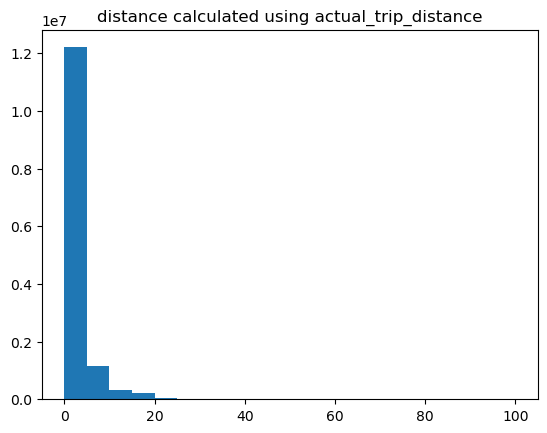

CPU times: user 30.4 s, sys: 3.41 s, total: 33.8 s
Wall time: 34.7 s


In [51]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)

c = 0
trip_dist = []

for row in reader:
    if c > 0:
        trip_dist.append(float(row[9]))
    c+=1

trip_dist = list(filter(lambda x: x > 0, trip_dist))
plt.hist(trip_dist, 20)
plt.title("distance calculated using actual_trip_distance")
plt.show()

In [32]:
# print(min(trip_dist), max(trip_dist), np.median(trip_dist), np.percentile(trip_dist, [25, 50 ,75, 99]))
# np.where(trip_dist > 20, )
# len(list(filter(lambda x: x == 0, trip_dist)))

73844

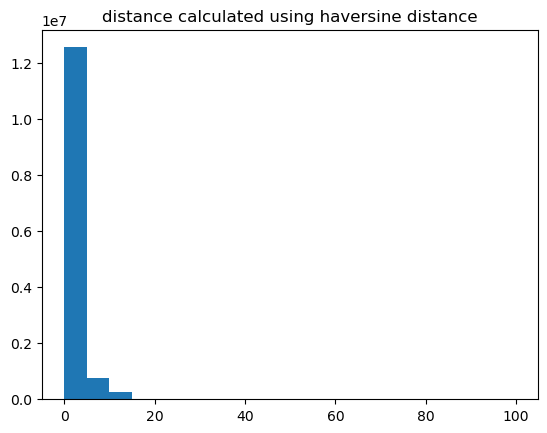

In [50]:
# Histogram on distance calculated using haversine distance

plt.hist(list(filter(lambda x: x > 0, dt)), 20)
plt.title("distance calculated using haversine distance")
plt.show()

### 7. What are the distinct values for each field? (If applicable)

In [53]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)
c = 0

medallion = []
hack_license = []
vendor_id = []
rate_code = []
store_and_fwd_flag = []
passenger_count = []
trip_time_in_secs = []
trip_distance = []

for row in reader:
    if c>0:
        try:
            medallion.append(row[0])
            hack_license.append(row[1])
            vendor_id.append(row[2])
            rate_code.append(int(row[3]))
            store_and_fwd_flag.append(row[4])
            passenger_count.append(int(row[7]))
            trip_time_in_secs.append(float(row[8]))
            trip_distance.append(float(row[9]))
        except Exception as e:
            print(row)
            print(e)
            break
    c+=1

print('''\n7. What are the distinct values for each field? (If applicable)''')
print(f'medallion: {np.unique(medallion)}')
print(f'hack_license: {np.unique(hack_license)}')
print(f'vendor_id: {np.unique(vendor_id)}')
print(f'rate_code: {np.unique(rate_code)}')
print(f'store_and_fwd_flag: {np.unique(store_and_fwd_flag)}')
print(f'passenger_count: {np.unique(passenger_count)}')


7. What are the distinct values for each field? (If applicable)
medallion: ['00005007A9F30E289E760362F69E4EAD' '000318C2E3E6381580E5C99910A60668'
 '000351EDC735C079246435340A54C7C1' ... 'FFF010F904EF7B60DAF12560AFE5127C'
 'FFF9D2834D24079962E68642F14BAC82' 'FFFECF75AB6CC4FF9E8A8B633AB81C26']
hack_license: ['0002555BBE359440D6CEB34B699D3932' '0008B3E338CE8C3377E071A4D80D3694'
 '000A4EBF1CEB9C6BD9978D4362493C6E' ... 'FFFBCEA3D4E21E05902EE67AD556F67C'
 'FFFC8985B6B37B60AE71741C01AC423A' 'FFFF521546CE00599FF7D09CABC0502B']
vendor_id: ['CMT' 'VTS']
rate_code: [  0   1   2   3   4   5   6   7  28  79 210 221]
store_and_fwd_flag: ['' 'N' 'Y']
passenger_count: [  0   1   2   3   4   5   6   7   8   9 129 208]
CPU times: user 39.4 s, sys: 8.77 s, total: 48.1 s
Wall time: 51.6 s


### 8. For other numeric types besides lat and lon, what are the min and max values?

In [57]:
## pc_median = np.median(list(map(int, np.unique(passenger_count))))
## passenger_count = np.array(passenger_count, dtype = int)

passenger_count = list(filter(lambda x:x>0, passenger_count))
trip_time_in_secs = list(filter(lambda x:x>0, trip_time_in_secs))
trip_distance = list(filter(lambda x:x>0, trip_distance))


min_pc, max_pc = min(passenger_count), max(passenger_count)
min_tt, max_tt = min(trip_time_in_secs), max(trip_time_in_secs)
min_td, max_td = min(trip_distance), max(trip_distance)

print('''8. For other numeric types besides lat and lon, what are the min and max values?''')
print('    columns      |    min    |    max     ')
print('-----------------|-----------|-------------')
print(f'passenger_count  | {min_pc:^10}| {max_pc:^10}')
print(f'trip_time_in_secs| {min_tt:^10}| {max_tt:^10}')
print(f'trip_distance    | {min_td:^10}| {max_td:^10}')

pc_median = np.median(passenger_count)
# print(pc_median)

passenger_count_updated = np.where((np.array(passenger_count) > 9) | (np.array(passenger_count) == 0), pc_median, np.array(passenger_count))

min_pc, max_pc = min(passenger_count_updated), max(passenger_count_updated)
print('\n    columns      |    min    |    max     ')
print('-----------------|-----------|-------------')
print(f'passenger_count  | {min_pc:^10}| {max_pc:^10}')
print(f'trip_time_in_secs| {min_tt:^10}| {max_tt:^10}')
print(f'trip_distance    | {min_td:^10}| {max_td:^10}')

8. For other numeric types besides lat and lon, what are the min and max values?
    columns      |    min    |    max     
-----------------|-----------|-------------
passenger_count  |     1     |    208    
trip_time_in_secs|    1.0    |  10800.0  
trip_distance    |    0.01   |   100.0   

    columns      |    min    |    max     
-----------------|-----------|-------------
passenger_count  |    1.0    |    9.0    
trip_time_in_secs|    1.0    |  10800.0  
trip_distance    |    0.01   |   100.0   


### 9. Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)

In [19]:
%%time

from datetime import datetime

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)
c = 0

hours_dict = {}

for row in reader:
    if c > 0:
        h = datetime.strptime(row[5], "%Y-%m-%d %H:%M:%S").hour
        pc = int(row[7])
        if not h in hours_dict.keys():
            hours_dict[h] = pc
        else:
            hours_dict[h] = hours_dict[h] + pc
    c+=1

CPU times: user 1min 2s, sys: 638 ms, total: 1min 3s
Wall time: 1min 3s


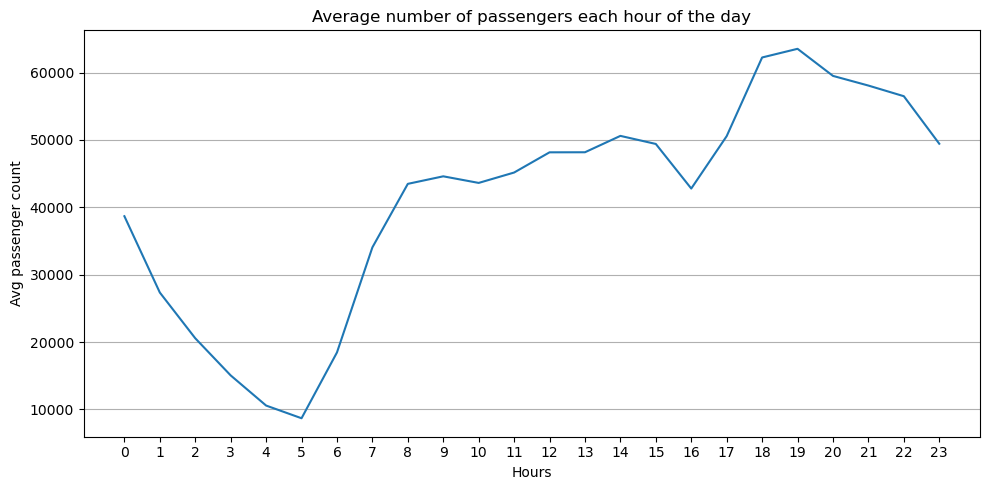

In [20]:
avg_pc_hour = dict(sorted({k: int(v/len(hours_dict)) for k, v in hours_dict.items()}.items()))
plt.figure(figsize = (10,5))
plt.plot(avg_pc_hour.keys(), avg_pc_hour.values())
plt.title('Average number of passengers each hour of the day')
plt.xlabel('Hours')
plt.ylabel('Avg passenger count')
plt.xticks(range(0, 24))
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

### 10. Create a new CSV file which has only one out of every thousand rows.

In [58]:
%%time

f = open('trip_data_2.csv', 'r')
reader = csv.reader(f)
c = 0
sample_rows = []

for row in reader:
    if c == 0:
        sample_rows.append(row)
    if c % 1000 == 1:
        sample_rows.append(row)
    c+=1

print('''10. Create a new CSV file which has only one out of every thousand rows''')
print(sample_rows[:10])

10. Create a new CSV file which has only one out of every thousand rows
[['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], ['1B5C0970F2AE8CFFBA8AE4584BEAED29', 'D961332334524990D1BBD462E2EFB8A4', 'CMT', '1', 'N', '2013-02-08 23:35:14', '2013-02-08 23:42:58', '1', '463', '.80', '-73.992439', '40.724487', '-73.984421', '40.718903'], ['AC77B897B23612F6857D90D4195E9292', '18F658FA8369EC322B56527C6EBA55EC', 'VTS', '1', '', '2013-02-01 16:01:00', '2013-02-01 16:05:00', '2', '240', '.02', '-73.979729', '40.755161', '-73.980225', '40.754196'], ['2D2792269580F25AE3C893CBB2FEF94C', 'E62CE1A5CC40099E4896353F50F0C883', 'VTS', '1', '', '2013-02-01 15:46:00', '2013-02-01 15:51:00', '5', '300', '.64', '-73.953995', '40.741585', '-73.953995', '40.741585'], ['45E64013C02CAB97F5651AD6873975EF', 'F41DB2

In [ ]:
f2=open("one_outof_1000.csv",'w')
f2.write('')
f2.close()
f2=open('one_outof_1000.csv','a')
w=csv.writer(f2,delimiter=',',lineterminator='\n')


for row in sample_rows:
    w.writerow(row)

### 11. Repeat step 9 with the reduced dataset and compare the two charts.

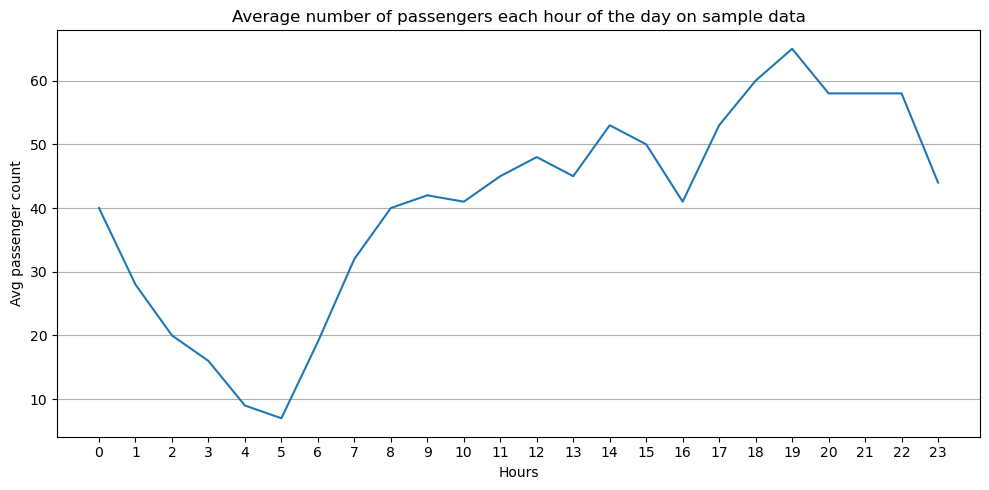

In [59]:
sample_hours_dict = {}
c = 0 
for row in sample_rows:
    if c > 0:
        h = datetime.strptime(row[5], "%Y-%m-%d %H:%M:%S").hour
        pc = int(row[7])
        if not h in sample_hours_dict.keys():
            sample_hours_dict[h] = pc
        else:
            sample_hours_dict[h] = sample_hours_dict[h] + pc
    c+=1
    
sample_avg_pc_hour = dict(sorted({k: int(v/len(sample_hours_dict)) for k, v in sample_hours_dict.items()}.items()))
plt.figure(figsize = (10,5))
# plt.bar(avg_pc_hour.keys(), avg_pc_hour.values())
plt.plot(sample_avg_pc_hour.keys(), sample_avg_pc_hour.values())
plt.title('Average number of passengers each hour of the day on sample data')
plt.xlabel('Hours')
plt.ylabel('Avg passenger count')
plt.xticks(range(0, 24))
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

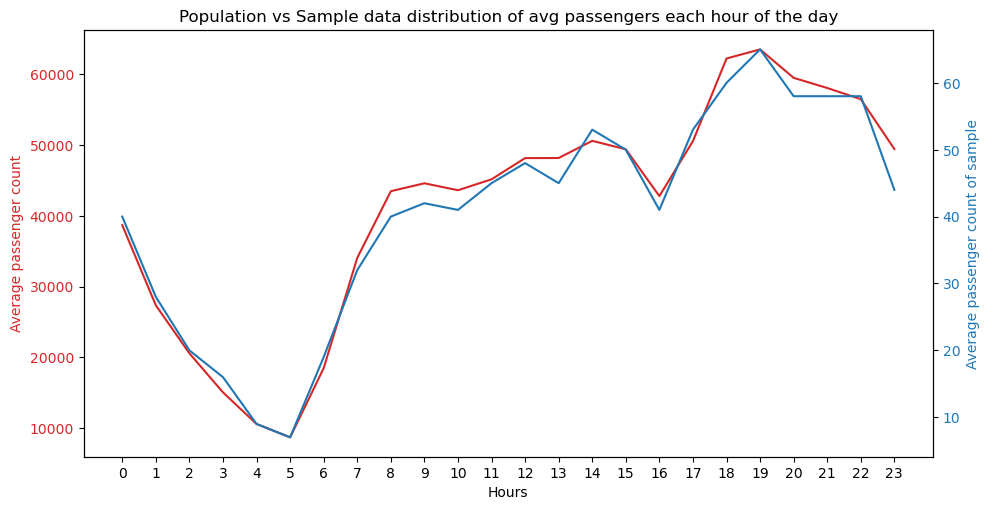

In [30]:
fig, ax1 = plt.subplots(figsize = (10,5))

color = 'tab:red'
ax1.set_xlabel('Hours')
ax1.set_ylabel('Average passenger count', color=color)
ax1.plot(avg_pc_hour.keys(), avg_pc_hour.values(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Average passenger count of sample', color=color)  
ax2.plot(sample_avg_pc_hour.keys(), sample_avg_pc_hour.values(), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(range(0, 24))
fig.tight_layout()  
plt.title('Population vs Sample data distribution of avg passengers each hour of the day')
plt.show()